In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv('Automobile_data.csv')
df.head()

,symboling,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,height,horsepower,peak-rpm,highway-mpg,city-mpg,price
0,3,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,111,5000,27,21,13495
1,3,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,111,5000,27,21,16500
2,1,alfa-romero,gas,hatchback,rwd,94.5,171.2,65.5,52.4,154,5000,26,19,16500
3,2,audi,gas,sedan,fwd,99.8,176.6,66.2,54.3,102,5500,30,24,13950
4,2,audi,gas,sedan,4wd,99.4,176.6,66.4,54.3,115,5500,22,18,17450


In [3]:
df.shape

(205, 14)

In [4]:
df = df.drop(['highway-mpg','city-mpg','stroke','bore','height','width','length','engine-location'], axis = 1)
df.head()

KeyError: "['stroke', 'bore', 'engine-location'] not found in axis"

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   curb-weight        205 non-null    int64  
 10  engine-type        205 non-null    object 
 11  num-of-cylinders   205 non-null    object 
 12  engine-size        205 non-null    int64  
 13  fuel-system        205 non-null    object 
 14  compression-ratio  205 non-null    float64
 15  horsepower         205 non-null    object 
 16  peak-rpm           205 non

In [9]:
df.describe()

,symboling,wheel-base,curb-weight,engine-size,compression-ratio
count,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,2555.565854,126.907317,10.142537
std,1.245307,6.021776,520.680204,41.642693,3.972040
min,-2.000000,86.600000,1488.000000,61.000000,7.000000
25%,0.000000,94.500000,2145.000000,97.000000,8.600000
50%,1.000000,97.000000,2414.000000,120.000000,9.000000
75%,2.000000,102.400000,2935.000000,141.000000,9.400000
max,3.000000,120.900000,4066.000000,326.000000,23.000000


In [10]:
df.isnull()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,compression-ratio,horsepower,peak-rpm,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors = 'coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors = 'coerce')
df['price'] = pd.to_numeric(df['price'], errors = 'coerce')
# df['normalized-losses'] = df['normalized-losses'].replace('?',np.NaN)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,compression-ratio,horsepower,peak-rpm,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,88.6,2548,dohc,four,130,mpfi,9.0,111.0,5000,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,88.6,2548,dohc,four,130,mpfi,9.0,111.0,5000,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,94.5,2823,ohcv,six,152,mpfi,9.0,154.0,5000,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,99.8,2337,ohc,four,109,mpfi,10.0,102.0,5500,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,99.4,2824,ohc,five,136,mpfi,8.0,115.0,5500,17450.0


In [12]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
wheel-base            0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
compression-ratio     0
horsepower            2
peak-rpm              0
price                 4
dtype: int64

In [14]:
df.median()

C:\Users\Loner Shan\AppData\Local\Temp\ipykernel_10600\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


symboling                1.0
normalized-losses      115.0
wheel-base              97.0
curb-weight           2414.0
engine-size            120.0
compression-ratio        9.0
horsepower              95.0
price                10295.0
dtype: float64

In [15]:
df.fillna(df.median(),inplace=True)
df.head()

C:\Users\Loner Shan\AppData\Local\Temp\ipykernel_10600\2621187510.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(),inplace=True)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,compression-ratio,horsepower,peak-rpm,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,88.6,2548,dohc,four,130,mpfi,9.0,111.0,5000,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,88.6,2548,dohc,four,130,mpfi,9.0,111.0,5000,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,94.5,2823,ohcv,six,152,mpfi,9.0,154.0,5000,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,99.8,2337,ohc,four,109,mpfi,10.0,102.0,5500,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,99.4,2824,ohc,five,136,mpfi,8.0,115.0,5500,17450.0


In [16]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
wheel-base           0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
compression-ratio    0
horsepower           0
peak-rpm             0
price                0
dtype: int64

In [18]:
df.describe()

,symboling,normalized-losses,wheel-base,curb-weight,engine-size,compression-ratio,horsepower,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,120.600000,98.756585,2555.565854,126.907317,10.142537,104.165854,13150.307317
std,1.245307,31.805105,6.021776,520.680204,41.642693,3.972040,39.529733,7879.121326
min,-2.000000,65.000000,86.600000,1488.000000,61.000000,7.000000,48.000000,5118.000000
25%,0.000000,101.000000,94.500000,2145.000000,97.000000,8.600000,70.000000,7788.000000
50%,1.000000,115.000000,97.000000,2414.000000,120.000000,9.000000,95.000000,10295.000000
75%,2.000000,137.000000,102.400000,2935.000000,141.000000,9.400000,116.000000,16500.000000
max,3.000000,256.000000,120.900000,4066.000000,326.000000,23.000000,288.000000,45400.000000


C:\Users\Loner Shan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Loner Shan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Loner Shan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Loner S

<AxesSubplot:xlabel='wheel-base'>

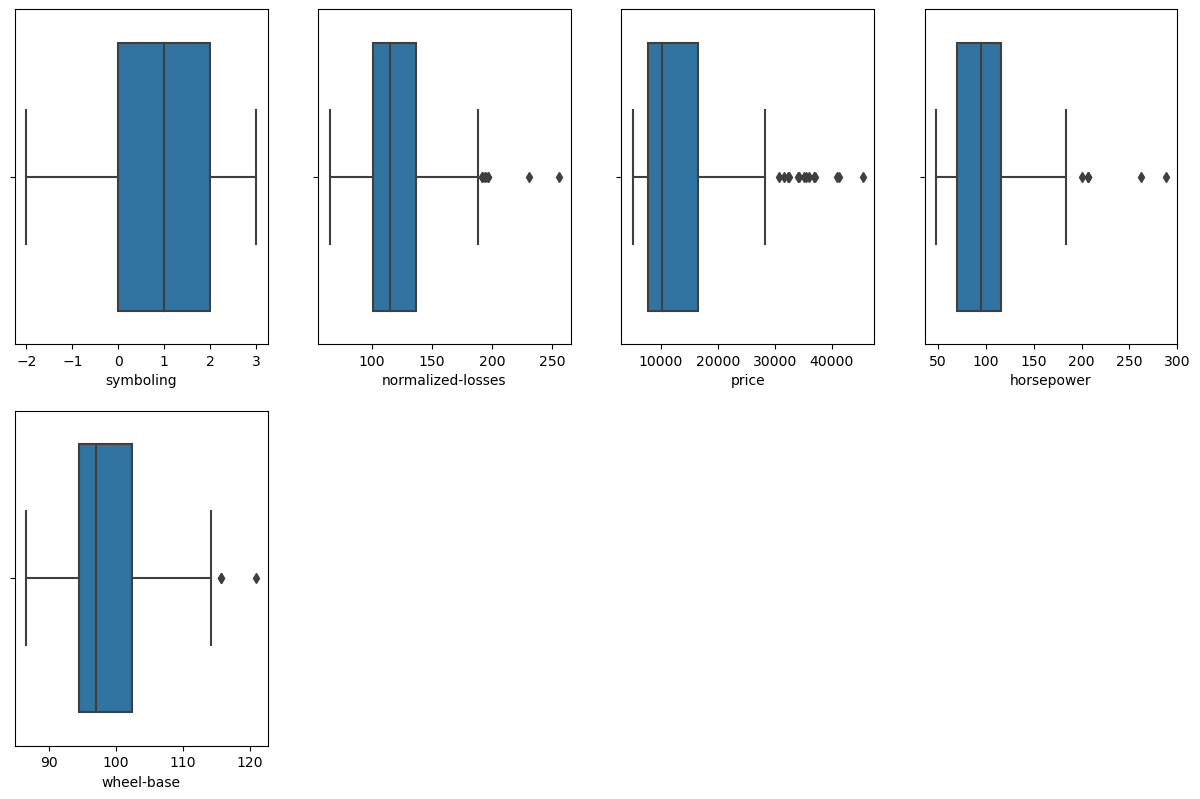

In [19]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 4, 1)
sns.boxplot(df['symboling'])

plt.subplot(4, 4, 2)
sns.boxplot(df['normalized-losses'])

plt.subplot(4, 4, 3)
sns.boxplot(df['price'])

plt.subplot(4, 4, 4)
sns.boxplot(df['horsepower'])

plt.subplot(4, 4, 5)
sns.boxplot(df['wheel-base'])


In [20]:
df['normalized-losses'] = df['normalized-losses'].clip(lower=df['normalized-losses'].quantile(0.05), 
                                                       upper=df['normalized-losses'].quantile(0.95))

In [21]:
df['price'] = df['price'].clip(lower = df['price'].quantile(0.05),upper = df['price'].quantile(0.95))

In [22]:
df['horsepower'] = df['horsepower'].clip(lower = df['horsepower'].quantile(0.05),
                                                       upper = df['horsepower'].quantile(0.95))

In [23]:
df['wheel-base'] = df['wheel-base'].clip(lower = df['wheel-base'].quantile(0.05),
                                                       upper = df['wheel-base'].quantile(0.95))

C:\Users\Loner Shan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Loner Shan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Loner Shan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Loner S

<AxesSubplot:xlabel='wheel-base'>

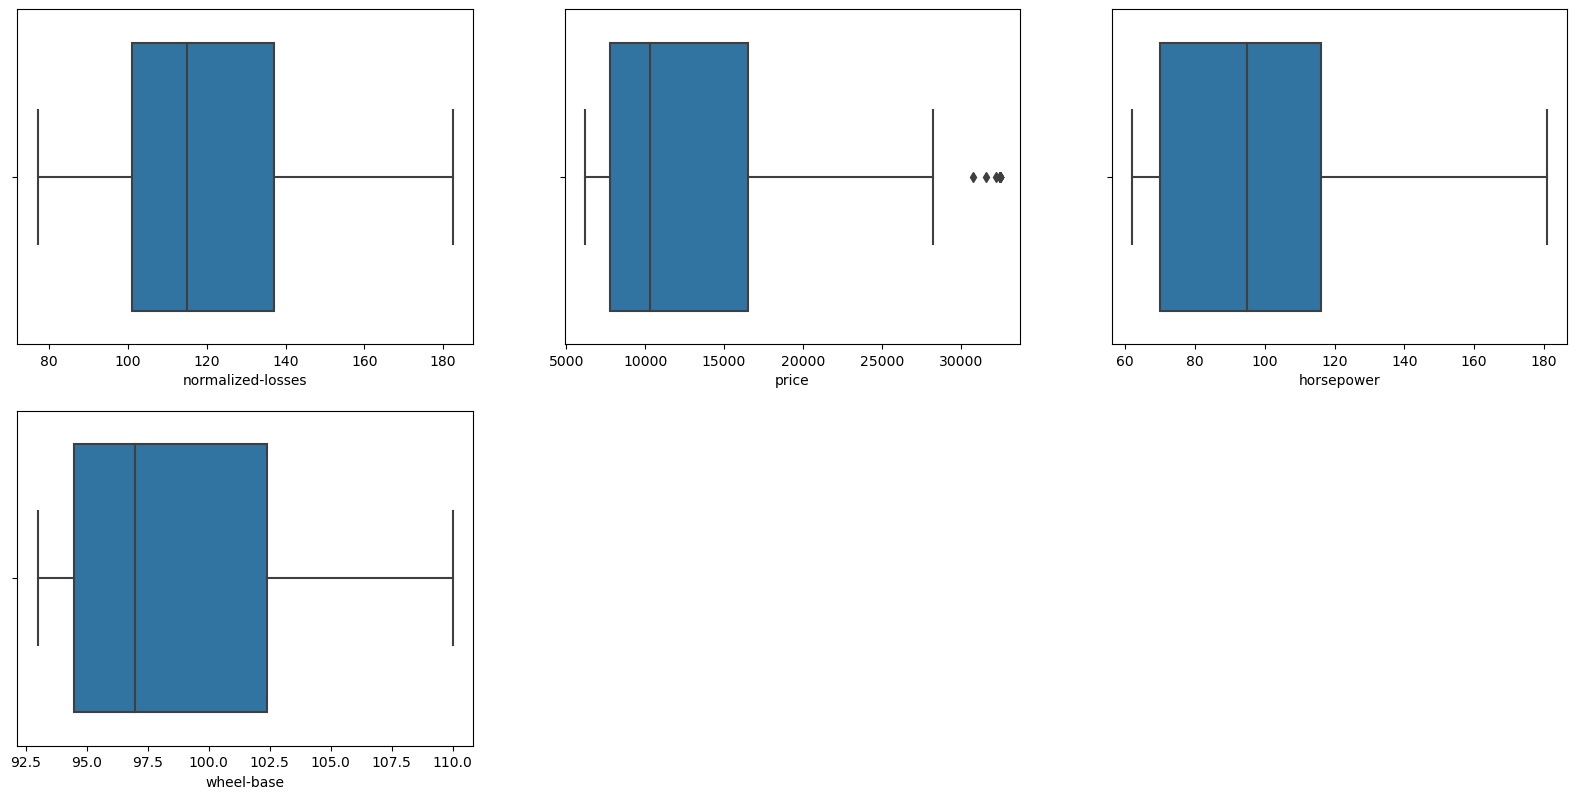

In [24]:
plt.figure(figsize=(20, 20))

plt.subplot(4, 3, 1)
sns.boxplot(df['normalized-losses'])

plt.subplot(4, 3, 2)
sns.boxplot(df['price'])

plt.subplot(4, 3, 3)
sns.boxplot(df['horsepower'])

plt.subplot(4, 3, 4)
sns.boxplot(df['wheel-base'])


In [25]:
df['price'] = df['price'].clip(lower = df['price'].quantile(0.10),upper = df['price'].quantile(0.90))

C:\Users\Loner Shan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

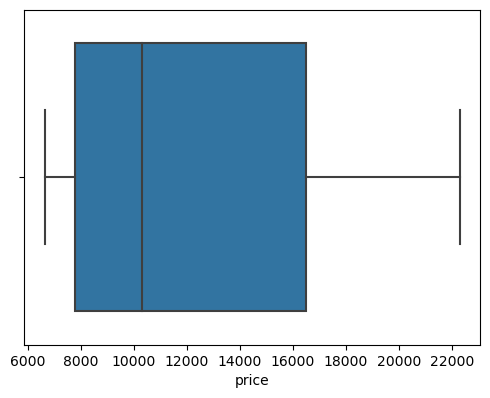

In [26]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.boxplot(df['price'])

C:\Users\Loner Shan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, '62.0'),
  Text(1, 0, '64.0'),
  Text(2, 0, '68.0'),
  Text(3, 0, '69.0'),
  Text(4, 0, '70.0'),
  Text(5, 0, '72.0'),
  Text(6, 0, '73.0'),
  Text(7, 0, '76.0'),
  Text(8, 0, '78.0'),
  Text(9, 0, '82.0'),
  Text(10, 0, '84.0'),
  Text(11, 0, '85.0'),
  Text(12, 0, '86.0'),
  Text(13, 0, '88.0'),
  Text(14, 0, '90.0'),
  Text(15, 0, '92.0'),
  Text(16, 0, '94.0'),
  Text(17, 0, '95.0'),
  Text(18, 0, '97.0'),
  Text(19, 0, '100.0'),
  Text(20, 0, '101.0'),
  Text(21, 0, '102.0'),
  Text(22, 0, '106.0'),
  Text(23, 0, '110.0'),
  Text(24, 0, '111.0'),
  Text(25, 0, '112.0'),
  Text(26, 0, '114.0'),
  Text(27, 0, '115.0'),
  Text(28, 0, '116.0'),
  Text(29, 0, '120.0'),
  Text(30, 0, '121.0'),
  Text(31, 0, '123.0'),
  Text(32, 0, '134.0'),
  Text(33, 0, '135.

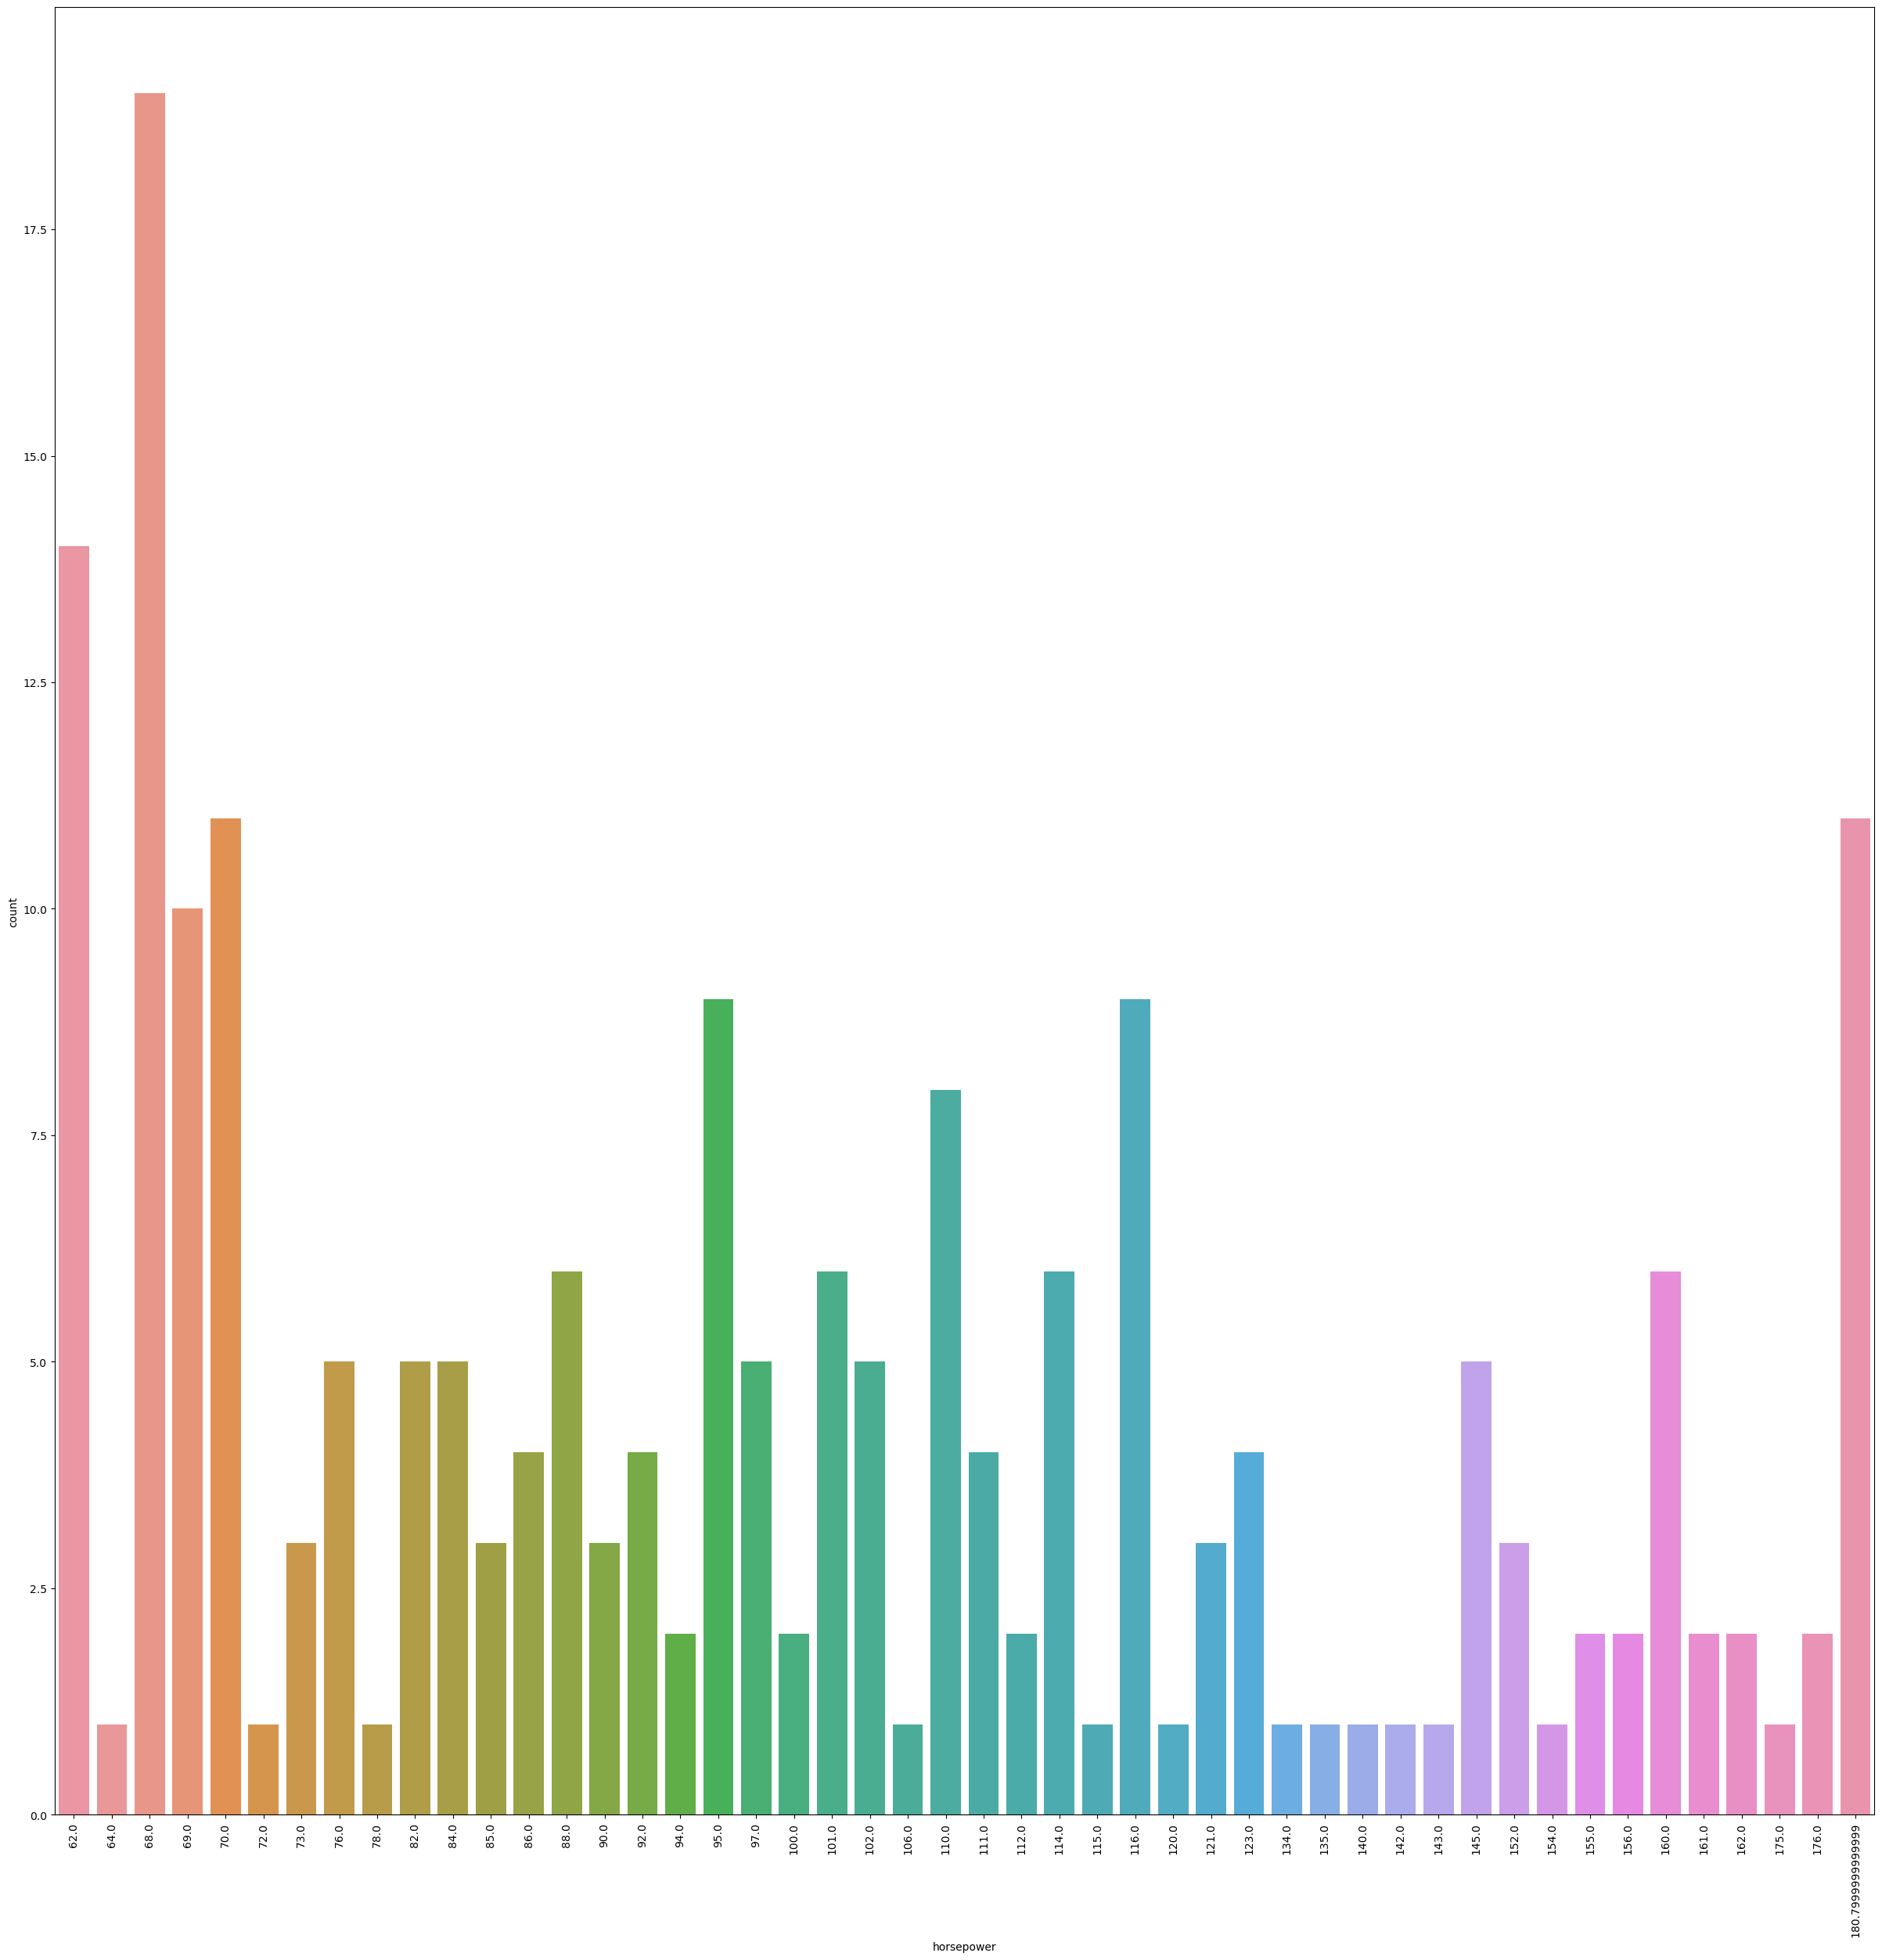

In [27]:
plt.figure(figsize=(30,30))
sns.countplot(df['horsepower'])
plt.xticks(rotation=90)

<AxesSubplot:>

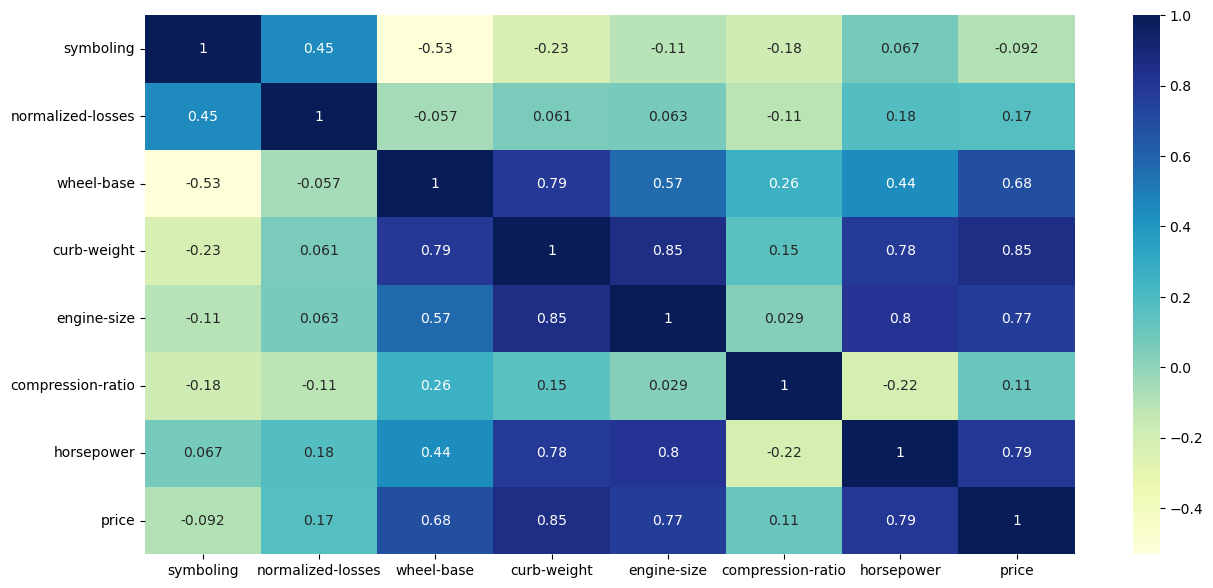

In [28]:
plt.figure(figsize=(15,7))
corr = df.corr('pearson')
sns.heatmap(corr, annot=True, cmap="YlGnBu")

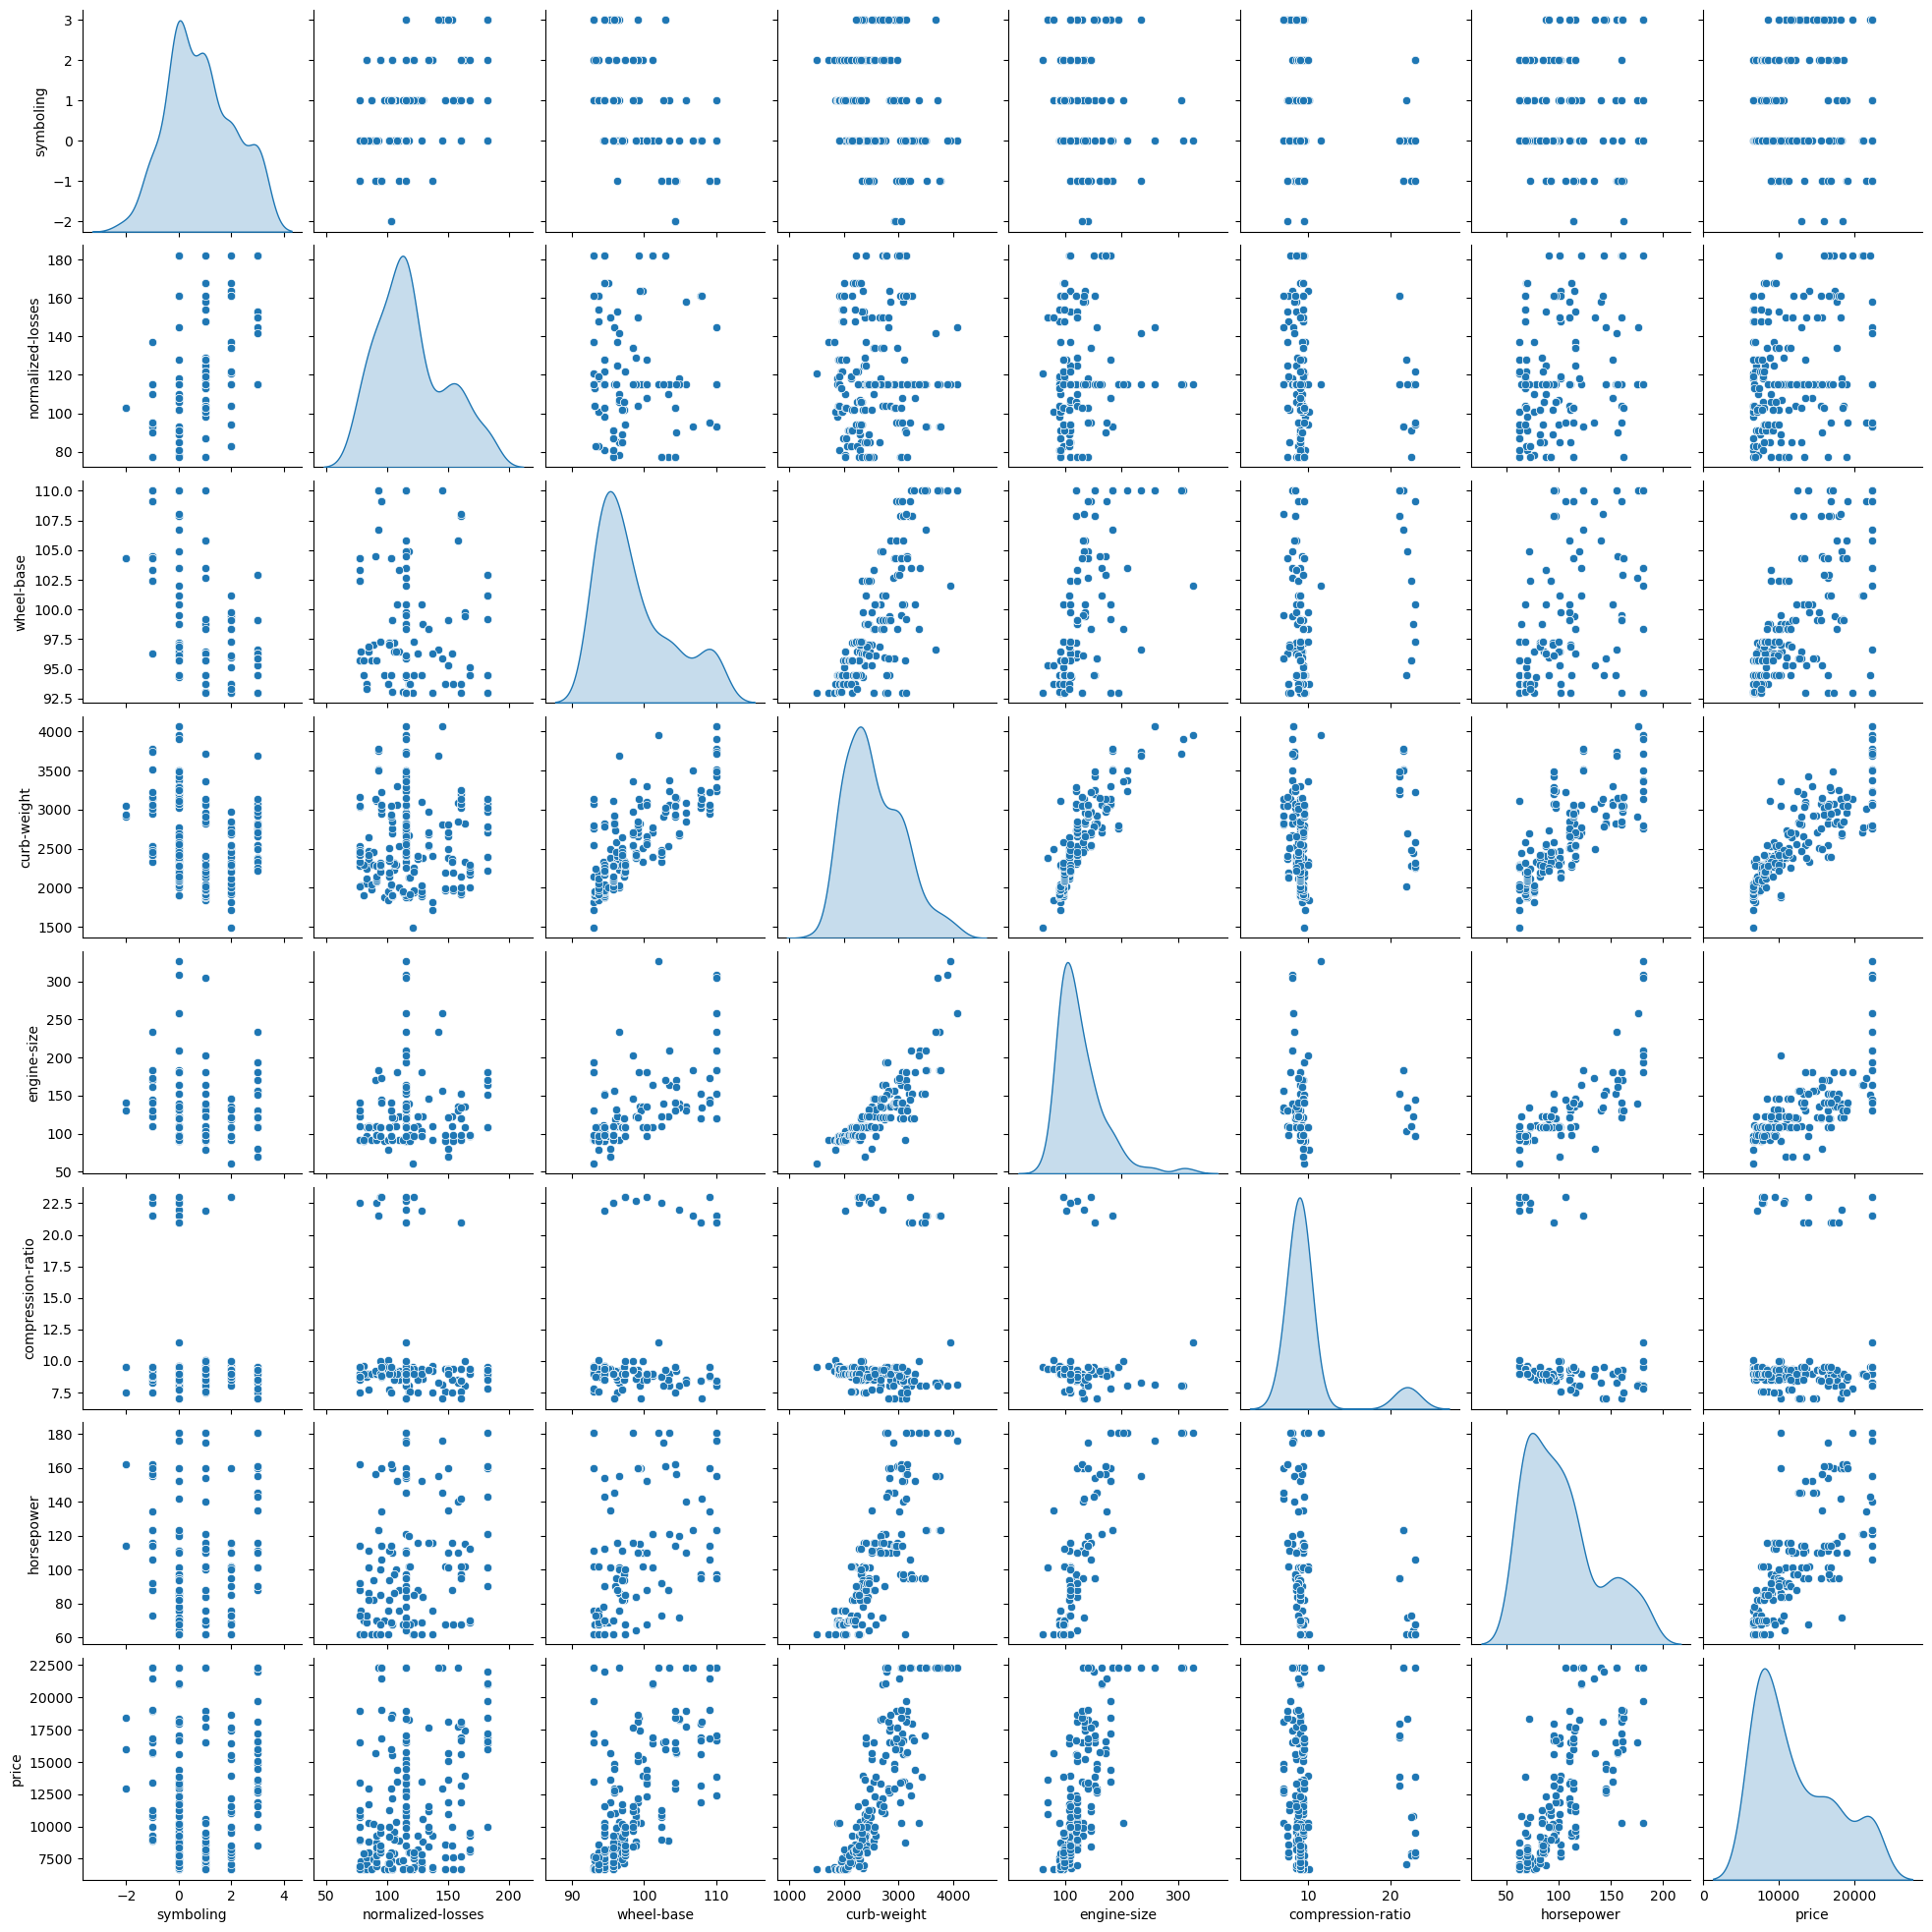

In [29]:
sns.pairplot(df,diag_kind="kde")

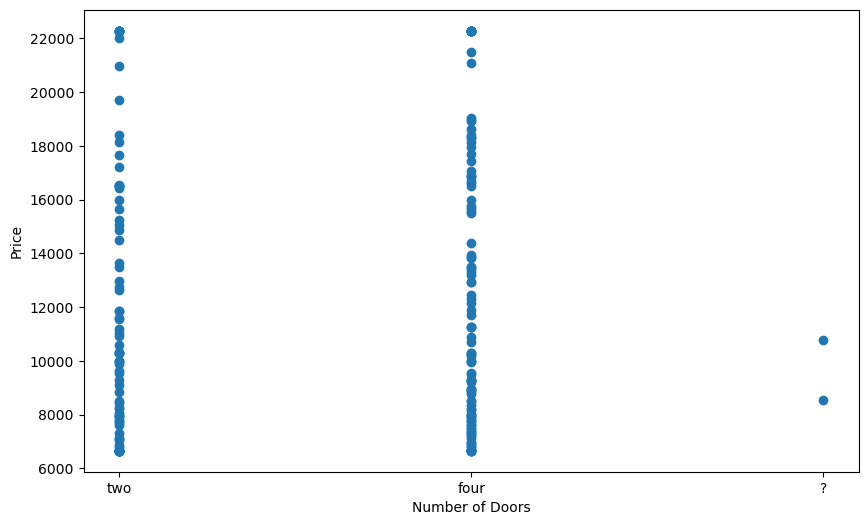

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['num-of-doors'], df['price'])
ax.set_xlabel('Number of Doors')
ax.set_ylabel('Price')
plt.show()

Text(0.5, 0, 'Manufacturing Company')

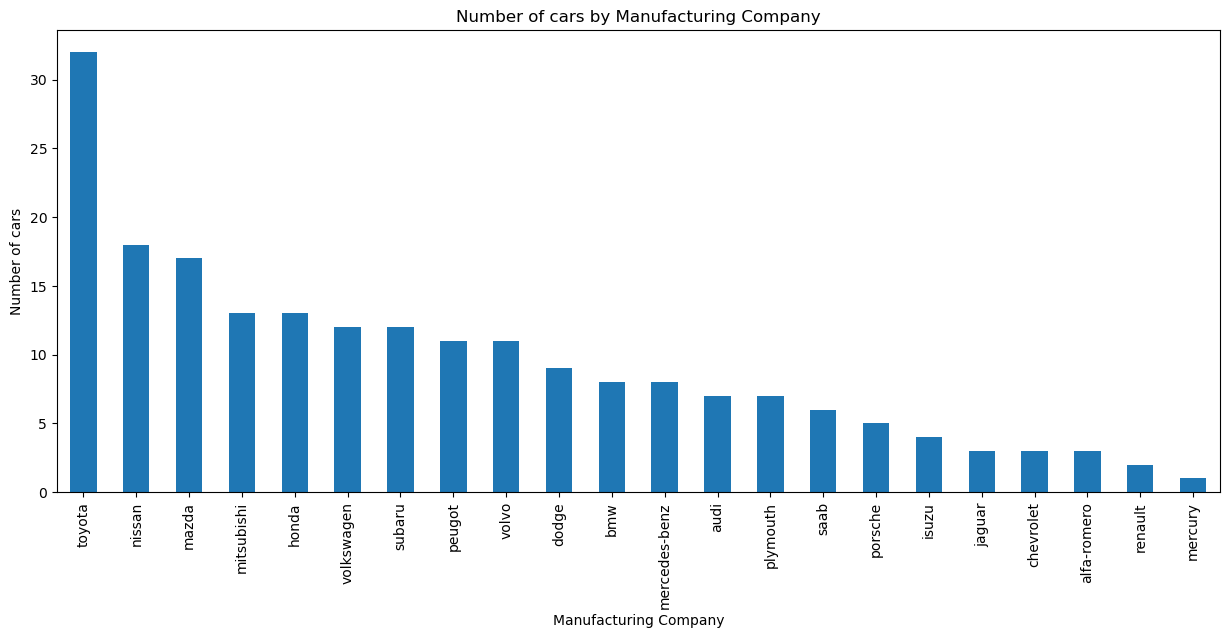

In [31]:
df.make.value_counts().nlargest(30).plot(kind='bar',figsize=(15,6))
plt.title("Number of cars by Manufacturing Company")
plt.ylabel('Number of cars')
plt.xlabel('Manufacturing Company')